### Importing Libraries

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading CSV file

In [213]:
data = pd.read_csv("day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [214]:
# drop instant, dteday, casual,registered droped from main data frame as those do not have much impact on model
data.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [215]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [216]:
# check if any null data present. Looks like there are no null values present.
data.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

Insights:
 - There are no null values in the dataset

### Exploring Dataset

In [217]:
# verify the dataset
data.shape

(730, 12)

In [218]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [219]:
#checking the data types of cloumns
data.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

<Figure size 2880x2880 with 0 Axes>

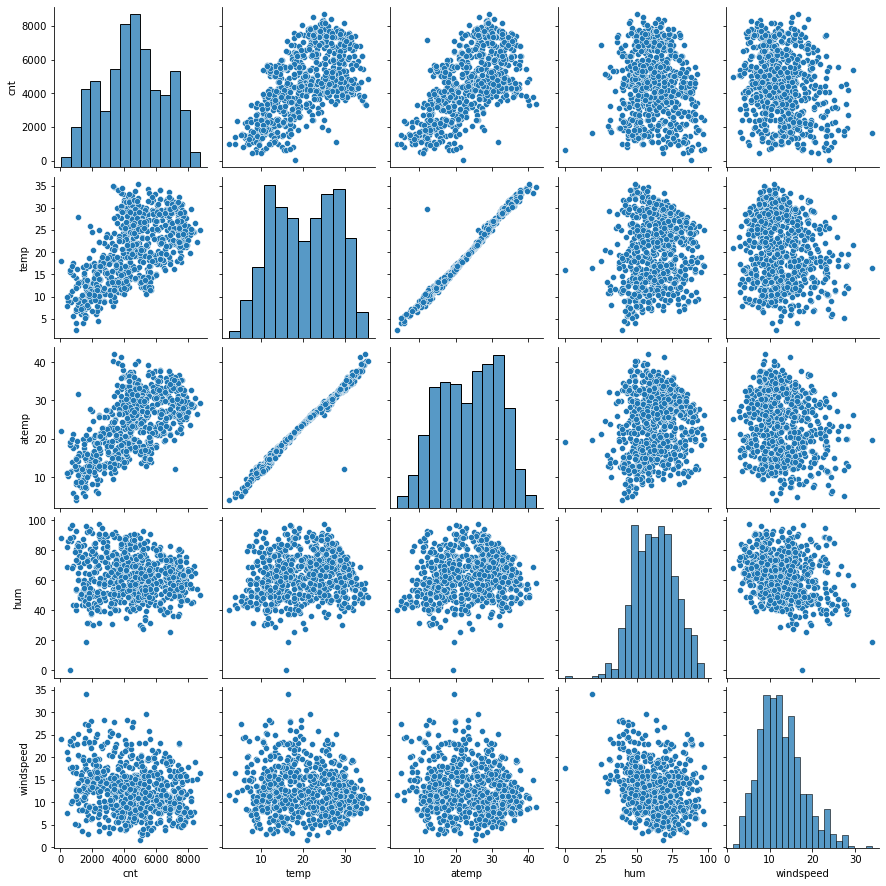

In [220]:
# plotting pair plot for continuous values
conCols = ["cnt","temp","atemp","hum","windspeed"]
plt.figure(figsize=(40,40))
sns.pairplot(data[conCols])
plt.show()

Insights:
- Clearly there are linear relationship between 'cnt',  'temp' and 'atemp'
- there are no strong liner relationship between 'cnt', 'hum' and 'windspped'
- very strong linear relationship between 'temp' and 'atemp'
- there are not much difference between  75% percentile and max values for continuous columns 


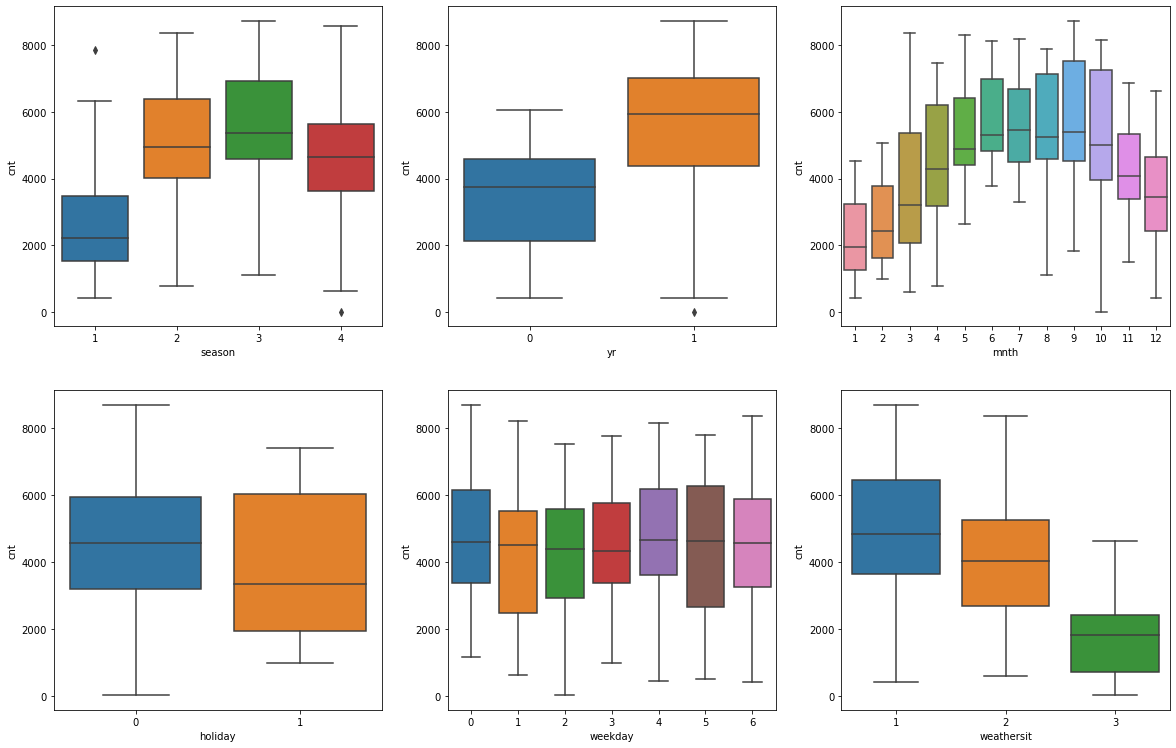

In [221]:
catCols = ['season','yr','mnth','holiday','weekday','weathersit']
plt.figure(figsize=(20, 20))
i =1
for col in catCols:
    plt.subplot(3,3,i)
    sns.boxplot(x=col,y='cnt',data=data)
    i+=1
    
plt.show()
    

Insights:

-  mean 'cnt'value is highest value for season 3 i.e Fall, following the season 2 i.e. summar, 4 i.e. winter and lowest for 1 i.e spring
-  'cnt' has incresed significantly from year 2019 compare to 2018. It clearly indicates business grows day by day.
-  'cnt' count is more on weekdays compare to holidays
-  no such significant change in weekdays or weekends. so this value seems like less impact to decide the model.
- 'cnt' significantly more on when weather is clear 

#### Corelartion coefficient

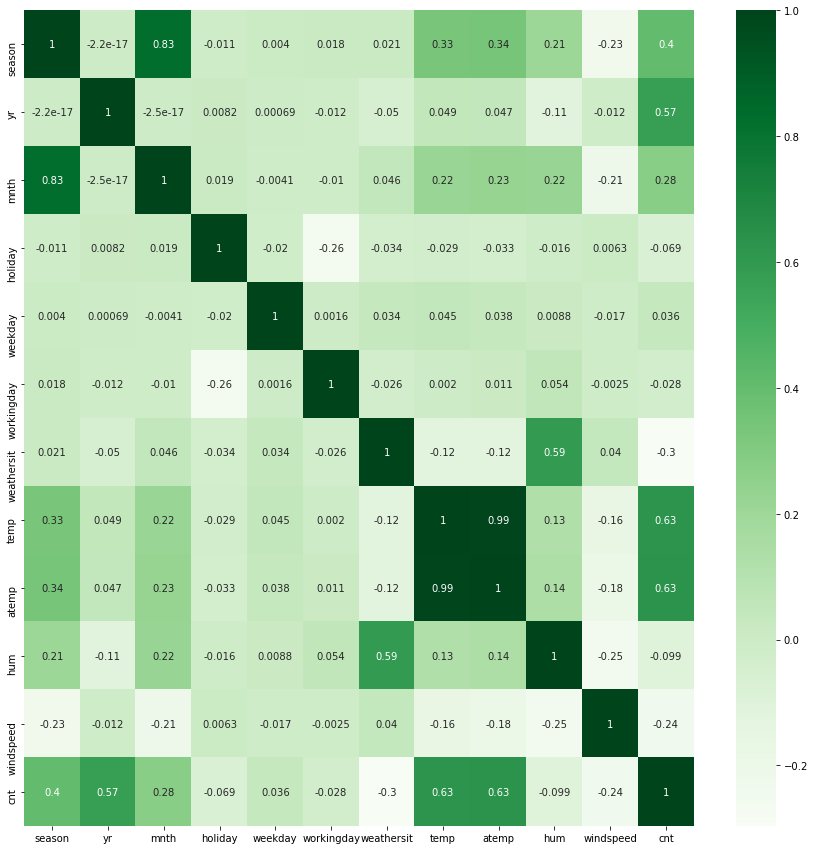

In [222]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(),annot=True,cmap='Greens')
plt.show()

Insights:

- 'yr', 'temp' and 'atemp' having strong corelation with 'cnt'. actually 'temp' and 'atemp' is behaving so similar that we can drop one column.

### Converting and scaling the data

List of categorical variables:

- season : 1:spring, 2:summer, 3:fall, 4:winter
- yr: 0: 2018, 1:2019
- months : 1 to 12
- holiday : 0 and 1
- workingday : 0 and 1
- weekday : 1 to 6
- weathersit : 1, 2, 3 and 4

#### treatment to Season

In [223]:
data.season.value_counts(normalize=True)

3    0.257534
2    0.252055
1    0.246575
4    0.243836
Name: season, dtype: float64

In [224]:
data.season=data.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
data.season.value_counts(normalize=True)

fall      0.257534
summer    0.252055
spring    0.246575
winter    0.243836
Name: season, dtype: float64

In [225]:
dummy_season=pd.get_dummies(data.season, drop_first=True)
dummy_season.describe()

,spring,summer,winter
count,730.000000,730.000000,730.000000
mean,0.246575,0.252055,0.243836
std,0.431313,0.434490,0.429689
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


In [226]:
data=pd.concat([data,dummy_season], axis=1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [227]:
data.drop('season',axis=1, inplace=True)
data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


#### treatment to yr

In [228]:
data.yr.value_counts(normalize=True)

1    0.5
0    0.5
Name: yr, dtype: float64

#### treatment to month

In [229]:
data.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [230]:
data.mnth=data.mnth.map({1:'jan', 2:'feb', 3:'mar',4:'apr',5:'may',6:'jun',
                     7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

dummy_mnth=pd.get_dummies(data.mnth, drop_first=True)
dummy_mnth.describe()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.084932,0.084932,0.076712,0.084932,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192
std,0.278971,0.278971,0.266317,0.278971,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [231]:
data=pd.concat([data,dummy_mnth], axis=1)
data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,jan,0,1,1,2,14.110847,18.18125,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,0,jan,0,2,1,2,14.902598,17.68695,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,0,jan,0,3,1,1,8.050924,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,0,jan,0,4,1,1,8.200000,10.60610,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,0,jan,0,5,1,1,9.305237,11.46350,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


In [232]:
data.drop('mnth',axis=1, inplace=True)
data.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


#### treatment to weekday

In [233]:
data.weekday.value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [234]:
data.weekday=data.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
dummy_weekday = pd.get_dummies(data.weekday,drop_first=True)
dummy_weekday.describe()

,mon,sat,sun,thu,tue,wed
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.143836,0.142466,0.142466,0.142466,0.143836,0.142466
std,0.351164,0.349767,0.349767,0.349767,0.351164,0.349767
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [235]:
data=pd.concat([data,dummy_weekday], axis=1)
data.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
0,0,0,mon,1,2,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,1,0,0,0,0,0
1,0,0,tue,1,2,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,1,0
2,0,0,wed,1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,0,1
3,0,0,thu,1,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,1,0,0
4,0,0,fri,1,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


In [236]:
data.drop('weekday',axis=1, inplace=True)
data.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
0,0,0,1,2,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,2,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,0


### treatment to weathersit

In [237]:
data.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [238]:
#we do not have any data for type 4 i.e Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
data.weathersit=data.weathersit.map({1:'clear', 2:'misty', 3:'light'})

In [239]:
data.weathersit.value_counts()

clear    463
misty    246
light     21
Name: weathersit, dtype: int64

In [240]:
dummy_weathersit=pd.get_dummies(data.weathersit, drop_first=True)

In [241]:
data=pd.concat([data,dummy_weathersit], axis=1)
data.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,...,oct,sep,mon,sat,sun,thu,tue,wed,light,misty
0,0,0,1,misty,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,misty,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,0


In [242]:
data.drop('weathersit',axis=1, inplace=True)
data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,light,misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


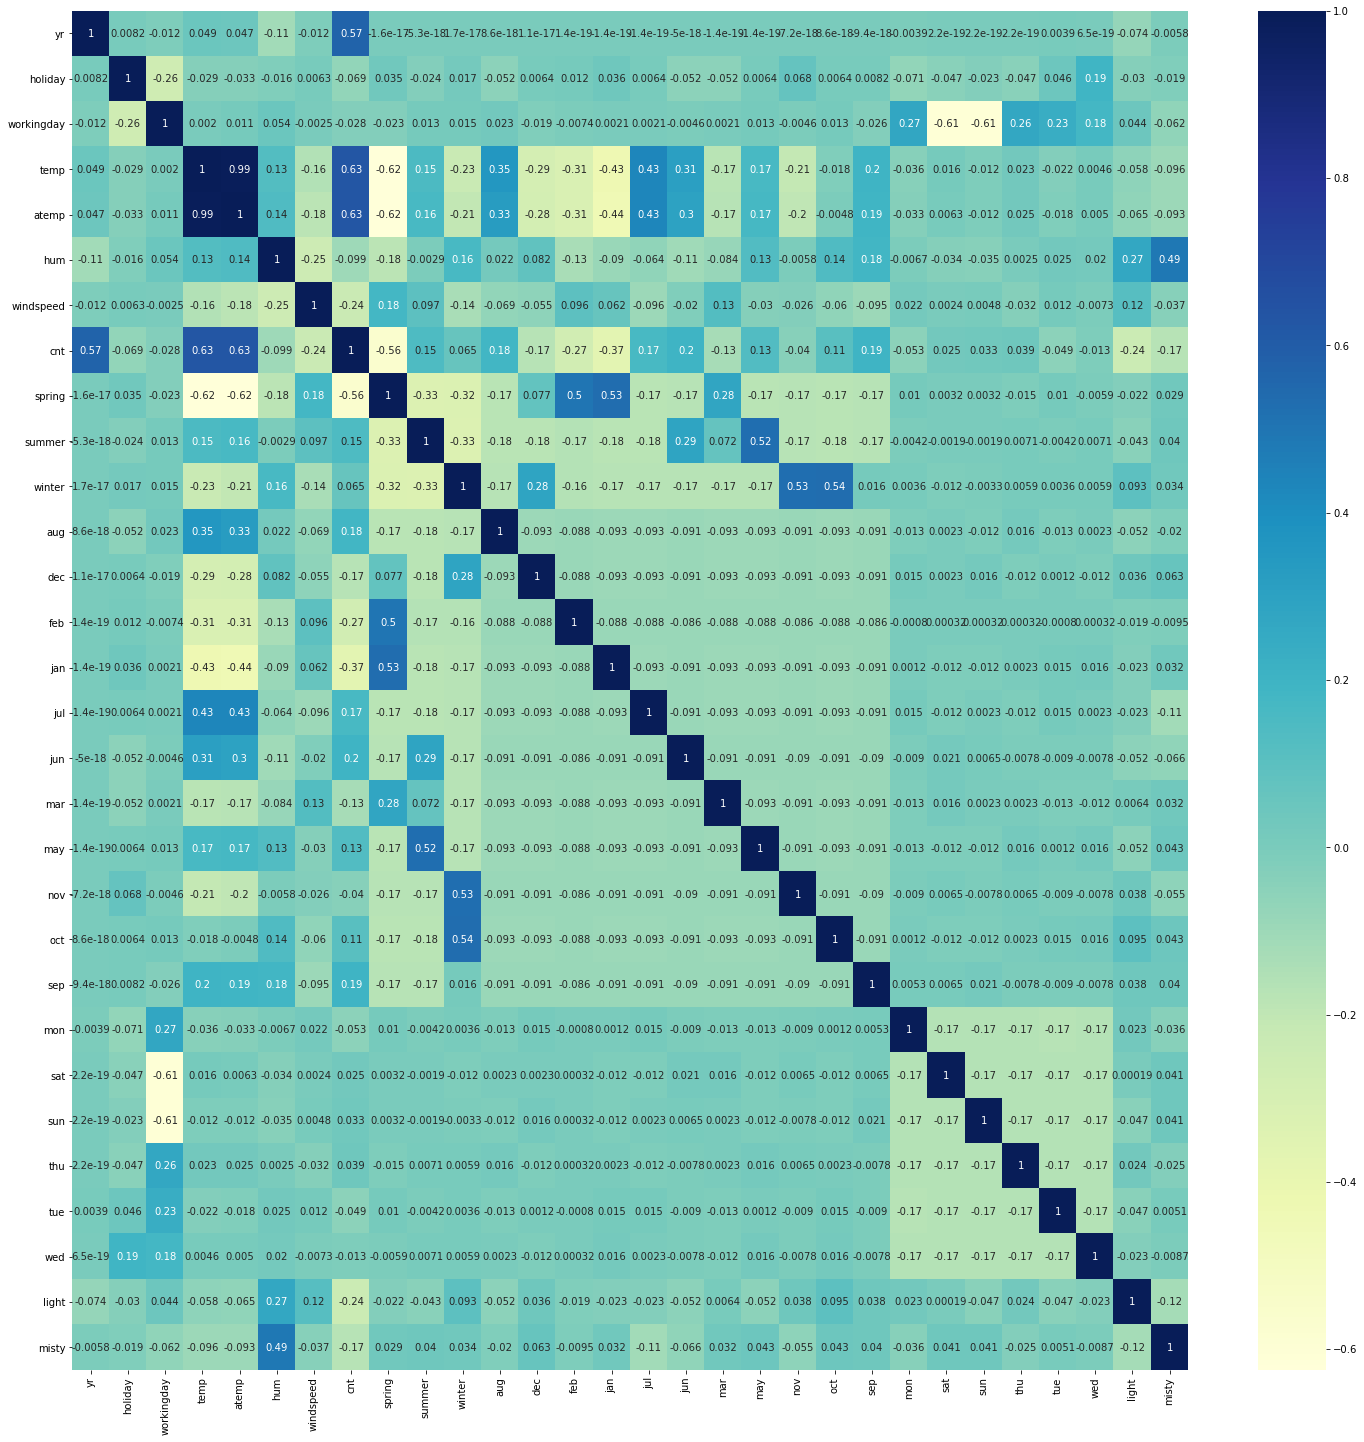

In [243]:
plt.figure(figsize=(25, 25))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [244]:
#droppingh similar column atemp
data.drop('atemp',axis=1, inplace=True)
data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,light,misty
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Spliting the data into train and test

In [245]:
from sklearn.model_selection import train_test_split

In [246]:
df_train, df_test = train_test_split(data, train_size=0.7, test_size=0.3, random_state=42)

In [247]:
df_train.shape

(510, 29)

In [248]:
df_test.shape

(219, 29)

In [249]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,light,misty
683,1,0,1,13.188347,62.0417,10.250129,5445,0,0,1,...,0,0,0,0,0,0,0,0,0,1
645,1,1,0,15.716653,70.9583,12.708493,5478,0,0,1,...,1,0,0,0,0,0,1,0,0,1
163,0,0,1,26.035000,49.4583,20.458450,5020,0,1,0,...,0,0,0,0,0,0,0,1,0,0
360,0,0,1,13.325000,76.2500,12.626150,1162,1,0,0,...,0,0,0,0,0,1,0,0,0,1
640,1,0,1,26.957500,79.3750,4.458569,7572,0,0,1,...,1,0,0,0,0,1,0,0,0,1


## Scaling variables

In [250]:
from sklearn.preprocessing import MinMaxScaler

In [251]:
#we can see temp, hum windspeed and cnt have larger values compare tp other columns 
#We can normalized the numbers using the MinMax method and have all the numbers within 0 and 1 range.
scalCols = ['temp','hum','windspeed', 'cnt']
scaler=MinMaxScaler()
df_train[scalCols]=scaler.fit_transform(df_train[scalCols])

<ipython-input-251-5fb7f397a063>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[scalCols]=scaler.fit_transform(df_train[scalCols])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [252]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,light,misty
683,1,0,1,0.327133,0.639330,0.327101,0.605336,0,0,1,...,0,0,0,0,0,0,0,0,0,1
645,1,1,0,0.403972,0.731215,0.419004,0.609320,0,0,1,...,1,0,0,0,0,0,1,0,0,1
163,0,0,1,0.717562,0.509660,0.708724,0.554026,0,1,0,...,0,0,0,0,0,0,0,1,0,0
360,0,0,1,0.331287,0.785745,0.415925,0.088253,1,0,0,...,0,0,0,0,0,1,0,0,0,1
640,1,0,1,0.745598,0.817947,0.110593,0.862127,0,0,1,...,1,0,0,0,0,1,0,0,0,1


## Create MLR based on temp and cnt

In [253]:
# as of now we have come to know temp having most corelation value with count. Even from scatte plot earlier visuall
# explain how the distribution of these 2 variables. 
import statsmodels.api as sm
y_train=df_train.pop('cnt')
X_train=df_train[:]


In [254]:
#adding constant to model
X_train_lm=sm.add_constant(X_train['temp'])

In [255]:
#creating linear regression object based on train data
lr = sm.OLS(y_train, X_train_lm).fit()

In [256]:
#summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     341.0
Date:                Wed, 03 Nov 2021   Prob (F-statistic):           1.23e-58
Time:                        20:45:49   Log-Likelihood:                 148.76
No. Observations:                 510   AIC:                            -293.5
Df Residuals:                     508   BIC:                            -285.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1390      0.021      6.603      0.000       0.098       0.180
temp           0.6519      0.035     18.467      0.000       0.583       0.721
==============================================================================
Omnibus:                       12.858   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                8.206
Skew:                           0.160   Prob(JB):                       0.0165
Kurtosis:                       2.467   Cond. No.                         5.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Insights:

-  R Sqared value is 0.402. It clearly explain 40.2% of variance is explained by temp.
-  As p-value is 0 so temp is statistically significant

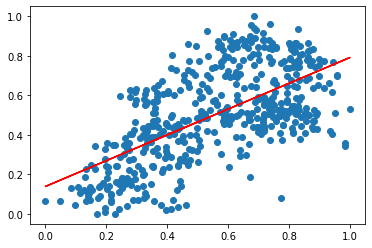

In [257]:
#regression line

plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.139 + 0.6519*X_train_lm.iloc[:, 1], 'r')
plt.show()

## RFE to select variables

In [258]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [259]:
#create RFE object
lrm = LinearRegression()
lrm.fit(X_train, y_train)

rfe = RFE(lrm, 10) 
rfe = rfe.fit(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [260]:
#RFE summary
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 15),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 11),
 ('winter', True, 1),
 ('aug', False, 13),
 ('dec', False, 2),
 ('feb', False, 12),
 ('jan', False, 19),
 ('jul', True, 1),
 ('jun', False, 16),
 ('mar', False, 5),
 ('may', False, 6),
 ('nov', True, 1),
 ('oct', False, 7),
 ('sep', False, 4),
 ('mon', False, 8),
 ('sat', False, 17),
 ('sun', False, 14),
 ('thu', False, 18),
 ('tue', False, 10),
 ('wed', False, 9),
 ('light', True, 1),
 ('misty', False, 3)]

In [261]:
#RFE significnat column list
rfe_cols=X_train.columns[rfe.support_]
rfe_cols

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'winter', 'jul',
       'nov', 'light'],
      dtype='object')

In [262]:
#creating independent variables train set with RFE cols
X_train_rfe=X_train[rfe_cols]
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,spring,winter,jul,nov,light
683,1,0,0.327133,0.639330,0.327101,0,1,0,1,0
645,1,1,0.403972,0.731215,0.419004,0,1,0,0,0
163,0,0,0.717562,0.509660,0.708724,0,0,0,0,0
360,0,0,0.331287,0.785745,0.415925,1,0,0,0,0
640,1,0,0.745598,0.817947,0.110593,0,1,0,0,0


In [263]:
# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,spring,winter,jul,nov,light
683,1.0,1,0,0.327133,0.639330,0.327101,0,1,0,1,0
645,1.0,1,1,0.403972,0.731215,0.419004,0,1,0,0,0
163,1.0,0,0,0.717562,0.509660,0.708724,0,0,0,0,0
360,1.0,0,0,0.331287,0.785745,0.415925,1,0,0,0,0
640,1.0,1,0,0.745598,0.817947,0.110593,0,1,0,0,0


In [264]:
#creating linear regression object based on train data
rfe_lr = sm.OLS(y_train, X_train_rfe).fit()

In [265]:
#summary
rfe_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     226.5
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          2.57e-178
Time:                        20:45:50   Log-Likelihood:                 454.27
No. Observations:                 510   AIC:                            -886.5
Df Residuals:                     499   BIC:                            -840.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3777      0.037     10.321      0.000       0.306       0.450
yr             0.2328      0.009     25.916      0.000       0.215       0.250
holiday       -0.0751      0.027     -2.744      0.006      -0.129      -0.021
temp           0.5038      0.035     14.319      0.000       0.435       0.573
hum           -0.2799      0.034     -8.130      0.000      -0.348      -0.212
windspeed     -0.1486      0.026     -5.741      0.000      -0.199      -0.098
spring        -0.1475      0.018     -8.288      0.000      -0.182      -0.113
winter         0.0796      0.015      5.408      0.000       0.051       0.109
jul           -0.0785      0.017     -4.487      0.000      -0.113      -0.044
nov           -0.0591      0.019     -3.097      0.002      -0.097      -0.022
light         -0.1733      0.028     -6.182      0.000      -0.228      -0.118
==============================================================================
Omnibus:                       60.061   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.640
Skew:                          -0.730   Prob(JB):                     1.90e-23
Kurtosis:                       4.672   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Insights:

-  R Sqared value is 0.819. It clearly explain 81.9% of variance is explained by this model
-  most of the p-values are 0 or very less value.so all independent variables are statisticall significant.

## Calculating VIF

In [266]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_rfe = X_train_rfe.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,16.27
2,temp,13.99
4,windspeed,5.04
5,spring,2.48
6,winter,2.47
0,yr,2.08
8,nov,1.63
7,jul,1.42
9,light,1.15
1,holiday,1.04


Insights:

-  Hum, temp and windspeed having very high VIF


## Dropping high VIF columns and creating models

In [267]:
 X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,spring,winter,jul,nov,light
683,1,0,0.327133,0.639330,0.327101,0,1,0,1,0
645,1,1,0.403972,0.731215,0.419004,0,1,0,0,0
163,0,0,0.717562,0.509660,0.708724,0,0,0,0,0
360,0,0,0.331287,0.785745,0.415925,1,0,0,0,0
640,1,0,0.745598,0.817947,0.110593,0,1,0,0,0


In [268]:
X_train_rfe2 = X_train_rfe.drop(['hum'], axis = 1)

In [269]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)
rfe_lr2 = sm.OLS(y_train,X_train_rfe2).fit()
rfe_lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     216.1
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          4.54e-166
Time:                        20:45:50   Log-Likelihood:                 422.55
No. Observations:                 510   AIC:                            -825.1
Df Residuals:                     500   BIC:                            -782.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1908      0.030      6.303      0.000       0.131       0.250
yr             0.2397      0.010     25.216      0.000       0.221       0.258
holiday       -0.0756      0.029     -2.600      0.010      -0.133      -0.018
temp           0.4702      0.037     12.658      0.000       0.397       0.543
windspeed     -0.0958      0.027     -3.597      0.000      -0.148      -0.043
spring        -0.1480      0.019     -7.820      0.000      -0.185      -0.111
winter         0.0643      0.016      4.141      0.000       0.034       0.095
jul           -0.0612      0.018     -3.317      0.001      -0.097      -0.025
nov           -0.0452      0.020     -2.238      0.026      -0.085      -0.006
light         -0.2379      0.029     -8.320      0.000      -0.294      -0.182
==============================================================================
Omnibus:                       63.902   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.353
Skew:                          -0.766   Prob(JB):                     4.01e-25
Kurtosis:                       4.715   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [270]:
X_train_rfe2 = X_train_rfe2.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_rfe2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.96
2,temp,4.78
0,yr,2.08
5,winter,1.98
4,spring,1.66
7,nov,1.63
6,jul,1.35
8,light,1.07
1,holiday,1.04


## Dropping High p-value columns

In [271]:
X_train_rfe2.head()

,yr,holiday,temp,windspeed,spring,winter,jul,nov,light
683,1,0,0.327133,0.327101,0,1,0,1,0
645,1,1,0.403972,0.419004,0,1,0,0,0
163,0,0,0.717562,0.708724,0,0,0,0,0
360,0,0,0.331287,0.415925,1,0,0,0,0
640,1,0,0.745598,0.110593,0,1,0,0,0


In [272]:
#dropping nov column
X_train_rfe3 = X_train_rfe2.drop(['nov'], axis = 1)

In [273]:
X_train_rfe3 = sm.add_constant(X_train_rfe3)
rfe_lr3 = sm.OLS(y_train,X_train_rfe3).fit()
rfe_lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     240.6
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          3.39e-166
Time:                        20:45:50   Log-Likelihood:                 420.01
No. Observations:                 510   AIC:                            -822.0
Df Residuals:                     501   BIC:                            -783.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1788      0.030      5.978      0.000       0.120       0.238
yr             0.2404      0.010     25.206      0.000       0.222       0.259
holiday       -0.0772      0.029     -2.644      0.008      -0.135      -0.020
temp           0.4887      0.036     13.444      0.000       0.417       0.560
windspeed     -0.0982      0.027     -3.676      0.000      -0.151      -0.046
spring        -0.1406      0.019     -7.517      0.000      -0.177      -0.104
winter         0.0514      0.014      3.551      0.000       0.023       0.080
jul           -0.0648      0.018     -3.511      0.000      -0.101      -0.029
light         -0.2323      0.029     -8.123      0.000      -0.288      -0.176
==============================================================================
Omnibus:                       58.243   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.318
Skew:                          -0.723   Prob(JB):                     4.47e-22
Kurtosis:                       4.593   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [274]:
X_train_rfe3 = X_train_rfe3.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_rfe3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.85
2,temp,4.68
0,yr,2.08
4,spring,1.65
5,winter,1.38
6,jul,1.35
7,light,1.07
1,holiday,1.04


In [275]:
#dropping holiday column as p-value is >0.005
X_train_rfe3

,yr,holiday,temp,windspeed,spring,winter,jul,light
683,1,0,0.327133,0.327101,0,1,0,0
645,1,1,0.403972,0.419004,0,1,0,0
163,0,0,0.717562,0.708724,0,0,0,0
360,0,0,0.331287,0.415925,1,0,0,0
640,1,0,0.745598,0.110593,0,1,0,0
...,...,...,...,...,...,...,...,...
700,1,0,0.359323,0.255447,0,1,0,0
71,0,0,0.405237,0.621696,1,0,0,0
106,0,0,0.495350,0.704080,0,0,0,0
270,0,0,0.717562,0.316186,0,1,0,0


In [276]:
X_train_rfe4 = X_train_rfe3.drop(['holiday'], axis = 1)


In [277]:
X_train_rfe4.head()

,yr,temp,windspeed,spring,winter,jul,light
683,1,0.327133,0.327101,0,1,0,0
645,1,0.403972,0.419004,0,1,0,0
163,0,0.717562,0.708724,0,0,0,0
360,0,0.331287,0.415925,1,0,0,0
640,1,0.745598,0.110593,0,1,0,0


In [278]:
X_train_rfe4 = sm.add_constant(X_train_rfe4)
rfe_lr4 = sm.OLS(y_train,X_train_rfe4).fit()
rfe_lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     270.7
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          6.32e-166
Time:                        20:45:50   Log-Likelihood:                 416.47
No. Observations:                 510   AIC:                            -816.9
Df Residuals:                     502   BIC:                            -783.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1754      0.030      5.836      0.000       0.116       0.234
yr             0.2400      0.010     25.019      0.000       0.221       0.259
temp           0.4907      0.037     13.421      0.000       0.419       0.563
windspeed     -0.0956      0.027     -3.561      0.000      -0.148      -0.043
spring        -0.1428      0.019     -7.597      0.000      -0.180      -0.106
winter         0.0506      0.015      3.474      0.001       0.022       0.079
jul           -0.0656      0.019     -3.531      0.000      -0.102      -0.029
light         -0.2301      0.029     -8.003      0.000      -0.287      -0.174
==============================================================================
Omnibus:                       62.382   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.673
Skew:                          -0.757   Prob(JB):                     4.16e-24
Kurtosis:                       4.665   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [279]:
X_train_rfe4 = X_train_rfe4.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_rfe4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.85
1,temp,4.68
0,yr,2.07
3,spring,1.63
4,winter,1.37
5,jul,1.35
6,light,1.07


Insights:

-   p-value <0.005 and VIF <5 are statisfied for all independent variables

## Residual Analysis of the train data

In [280]:
X_train_rfe4.head()

,yr,temp,windspeed,spring,winter,jul,light
683,1,0.327133,0.327101,0,1,0,0
645,1,0.403972,0.419004,0,1,0,0
163,0,0.717562,0.708724,0,0,0,0
360,0,0.331287,0.415925,1,0,0,0
640,1,0.745598,0.110593,0,1,0,0


In [281]:
y_train.head()

683    0.605336
645    0.609320
163    0.554026
360    0.088253
640    0.862127
Name: cnt, dtype: float64

In [282]:
# get prediction values for dependenmt variables
X_train_rfe4 = sm.add_constant(X_train_rfe4)
y_train_pred = rfe_lr4.predict(X_train_rfe4)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


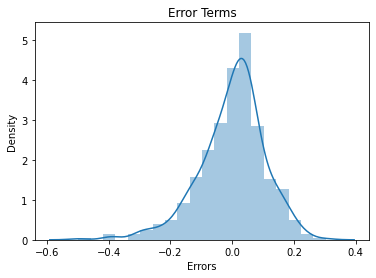

In [283]:
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms')                 
plt.xlabel('Errors')  
plt.show()

Insights:

-  we can see errors are normally distributed

In [284]:
X_train_rfe4.columns

Index(['const', 'yr', 'temp', 'windspeed', 'spring', 'winter', 'jul', 'light'], dtype='object')

## Predicting values

In [285]:
scalCols = ['temp','hum','windspeed', 'cnt']
scaler=MinMaxScaler()
df_test[scalCols]=scaler.fit_transform(df_test[scalCols])
df_test.head()

<ipython-input-285-29236cfe20f1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[scalCols]=scaler.fit_transform(df_test[scalCols])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,light,misty
468,1,0,0,0.536626,0.401487,0.313071,0.871675,0,1,0,...,0,0,0,0,1,0,0,0,0,0
148,0,0,1,0.769438,0.804036,0.363028,0.558537,0,1,0,...,0,0,0,0,0,0,1,0,0,0
302,0,0,1,0.299316,0.555496,0.282038,0.387789,0,0,1,...,1,0,0,0,0,0,1,0,0,0
355,0,0,0,0.439902,0.725969,0.001356,0.356967,1,0,0,...,0,0,0,1,0,0,0,0,0,1
515,1,0,1,0.786308,0.388742,0.322536,0.857377,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [286]:
# splitting X and y
y_test = df_test.pop('cnt')
X_test = df_test[:]

In [287]:
#selecting only eligible columns from X test
X_train_rfe4.drop(columns='const', inplace=True)

In [288]:
X_test = X_test[X_train_rfe4.columns]

In [289]:
X_test.head()

,yr,temp,windspeed,spring,winter,jul,light
468,1,0.536626,0.313071,0,0,0,0
148,0,0.769438,0.363028,0,0,0,0
302,0,0.299316,0.282038,0,1,0,0
355,0,0.439902,0.001356,1,0,0,0
515,1,0.786308,0.322536,0,0,0,0


In [290]:
X_test = sm.add_constant(X_test)

In [291]:
y_pred = rfe_lr4.predict(X_test)

In [292]:
lst = list(X_train_rfe4.columns)
lst.append('cnt')
lst


['yr', 'temp', 'windspeed', 'spring', 'winter', 'jul', 'light', 'cnt']

In [293]:
data = data[lst]
data.head()


,yr,temp,windspeed,spring,winter,jul,light,cnt
0,0,14.110847,10.749882,1,0,0,0,985
1,0,14.902598,16.652113,1,0,0,0,801
2,0,8.050924,16.636703,1,0,0,0,1349
3,0,8.200000,10.739832,1,0,0,0,1562
4,0,9.305237,12.522300,1,0,0,0,1600


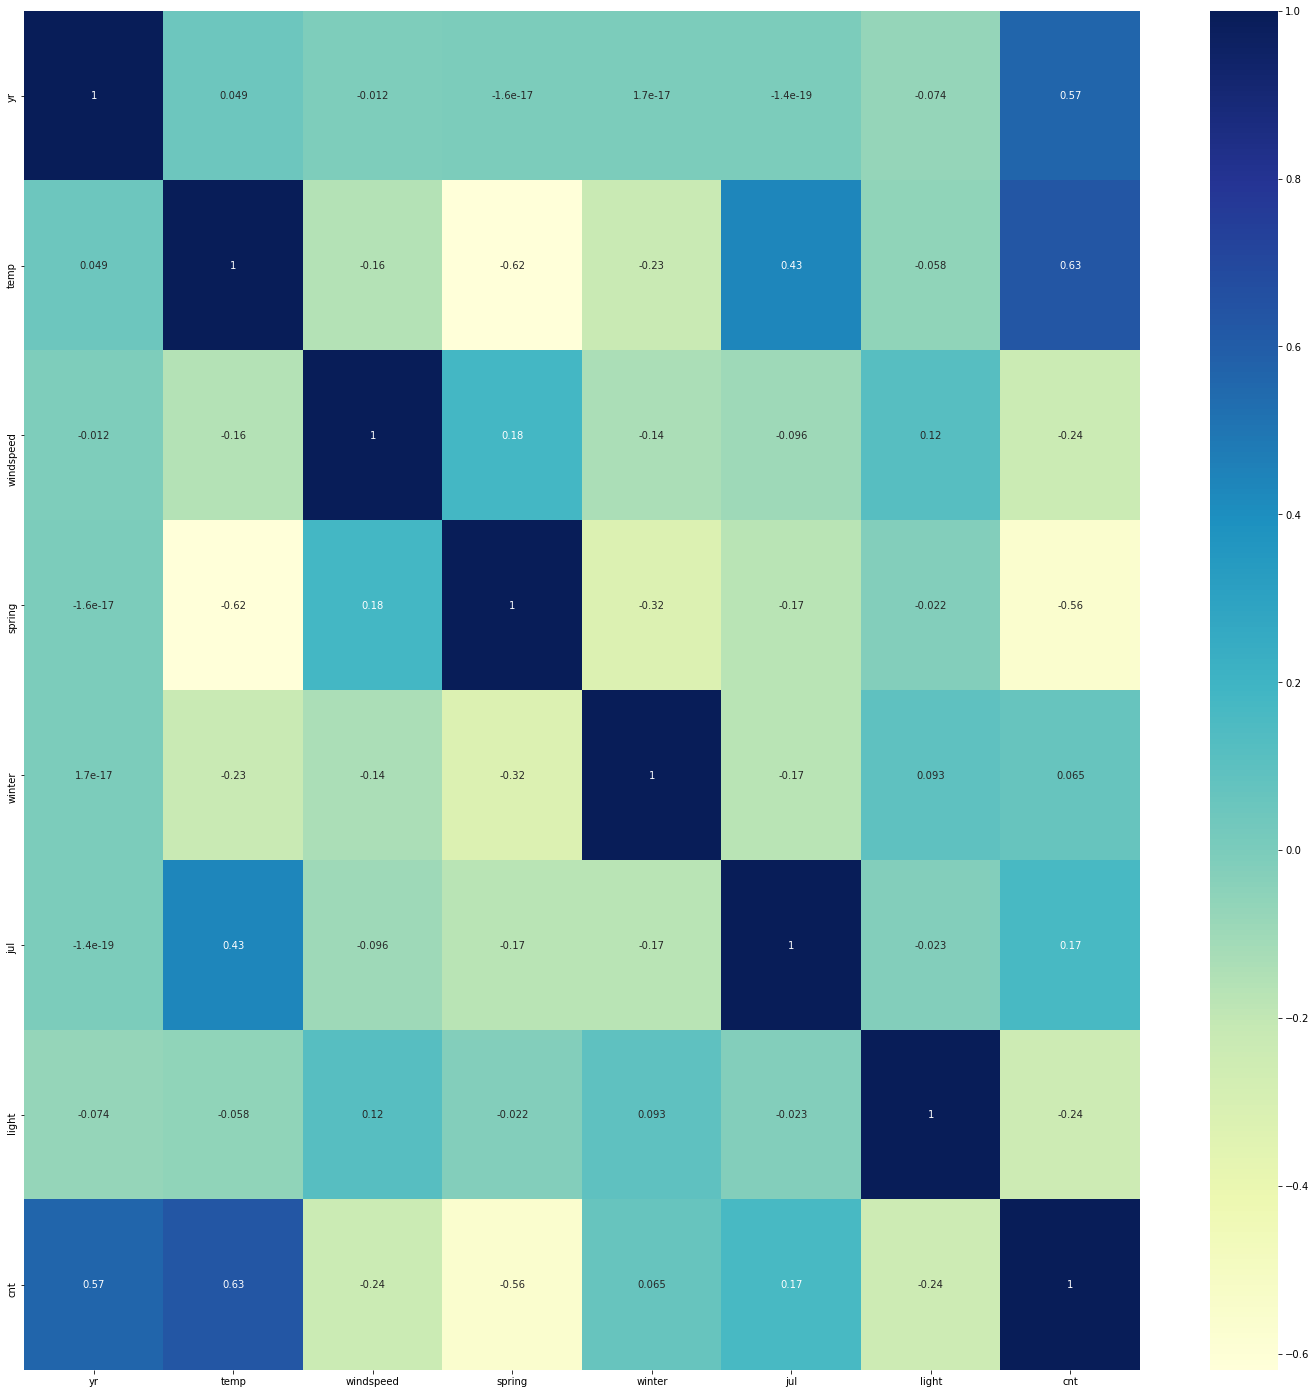

In [294]:
plt.figure(figsize=(25, 25))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')
plt.show()

## Evaluation

In [295]:
from sklearn.metrics import r2_score

In [296]:
print(f'Training Set R2 Score :- {r2_score(y_true=y_train, y_pred=y_train_pred)}')
print(f'Test Result R2 score :- {r2_score(y_true=y_test, y_pred=y_pred)}')


Training Set R2 Score :- 0.7905919234041288
Test Result R2 score :- 0.7600079977496099


In [297]:
from sklearn.metrics import mean_squared_error

print(f'Mean Squared Error for Training :- {mean_squared_error(y_true=y_train, y_pred=y_train_pred)}')
print(f'Mean Squared Error for Test :- {mean_squared_error(y_true=y_test, y_pred=y_pred)}')

Mean Squared Error for Training :- 0.011434594889339646
Mean Squared Error for Test :- 0.012230178454326916


Insights:

- linear regression model able to predict 76% accuracy
- Mean Squared error is 0.01 for training and test data.It indicates our model able to predict unknown data with same proficiency